<a href="https://colab.research.google.com/github/nurilhaidar/Machine-Learning/blob/main/Mukhammad_Nuril_Haidar_Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>TUGAS 1<h1>**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

1. Load dataset cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


2. Normalisasi pixel menjadi 1 dan 0

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

3. Membuat model CNN dan menambahkan layers pada model yang telah dibuat dan ditambahkan dropout untuk mengurangi 5% unit yang akan di proses

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

4. Menambahkan layer fully connected pada model

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

5. Hasil model yang telah dibuat

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

6. Mengcompile model CNN

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

7. Memasukkan data train ke dalam model

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8265 - accuracy: 0.7143 - val_loss: 0.8799 - val_accuracy: 0.6931
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8163 - accuracy: 0.7183 - val_loss: 0.7046 - val_accuracy: 0.7553
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7973 - accuracy: 0.7213 - val_loss: 0.7934 - val_accuracy: 0.7211
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7872 - accuracy: 0.7271 - val_loss: 0.7526 - val_accuracy: 0.7418
Epoch 5/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7778 - accuracy: 0.7316 - val_loss: 0.6960 - val_accuracy: 0.7603
Epoch 6/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7594 - accuracy: 0.7376 - val_loss: 0.7560 - val_accuracy: 0.7413
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7476 - accuracy: 0.7413 - val_loss: 0.6993 -

7. Tabel akurasi hasil testing

313/313 - 1s - loss: 0.5886 - accuracy: 0.8009 - 753ms/epoch - 2ms/step


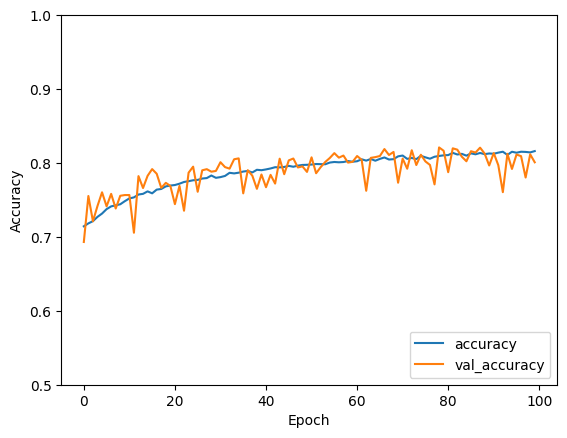

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

8. Akurasi yang didapat adalah 80%

In [ ]:
print(test_acc)

0.8008999824523926


**<h1>TUGAS 2<h1>**

1. Load dataset cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


2. Normalisasi pixel menjadi 1 dan 0

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

3. Membuat model CNN dan menambahkan layers pada model yang telah dibuat

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

4. Menambahkan layer fully connected pada model

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

5. Mengcompile model CNN

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

6. Memasukkan data train ke dalam model

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1448 - accuracy: 0.9550 - val_loss: 0.0611 - val_accuracy: 0.9800
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0352 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0326 - val_accuracy: 0.9900


7. Tabel akurasi hasil testing

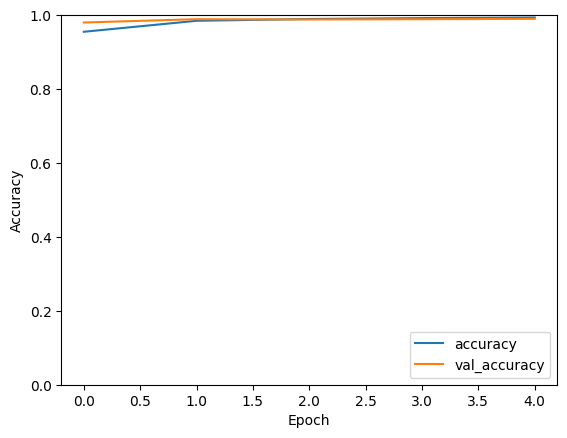

313/313 - 3s - loss: 0.0326 - accuracy: 0.9900 - 3s/epoch - 11ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

8. Akurasi testing menunjukan 99%

In [ ]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9900000095367432
